In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 

import sys
sys.path.append('./src')

from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

property = 'Wind_pre_7'

s_c = 'ALL'

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]
df_sampled = df[(df.loc[:, weather_columns] != -1).all(axis=1) & (df.loc[:, weather_columns] != 0).all(axis=1)]

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()

print(f'min value: {min_amount}; max value: {max_amount}')

min value: 0.262937063; max value: 19.88060606


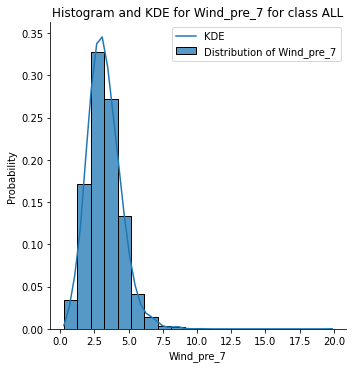

In [8]:
x = np.linspace(min_amount, max_amount, num=50)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 20)

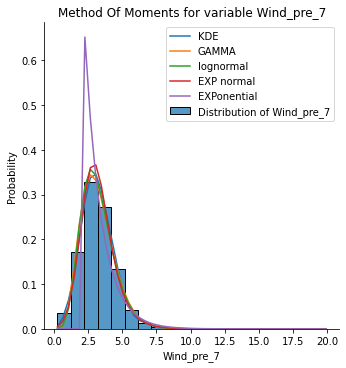

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.999974022667643, pvalue=1.0733899785359788e-229), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666516151757303, pvalue=5.219954468671517e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9998973385354568, pvalue=7.437085442872267e-200), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.665767699780485, pvalue=5.215720078055597e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9981696626331902, pvalue=2.676623566958388e-137), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.62801877619848, pvalue=5.006073333646555e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


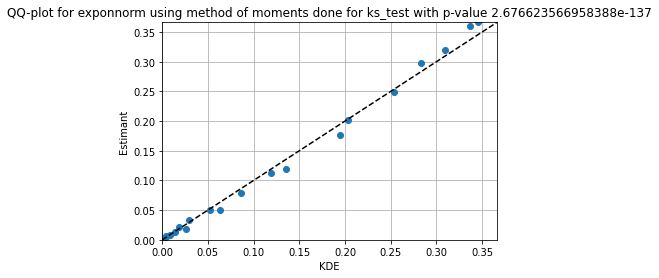

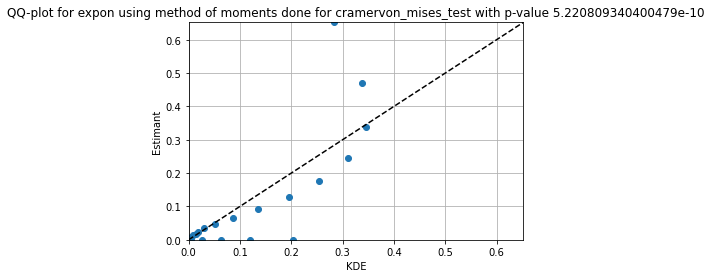

In [9]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 20)

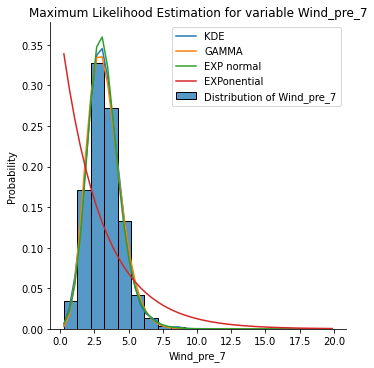

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9992955636328595, pvalue=4.933083094124324e-158), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.657697163255737, pvalue=5.170256445197197e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.997348291037542, pvalue=3.00139268599787e-129), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.606648734339657, pvalue=4.890753357855715e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9724909709821266, pvalue=1.8827517817568792e-78), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.52296359396813, pvalue=4.461589986348713e-10)


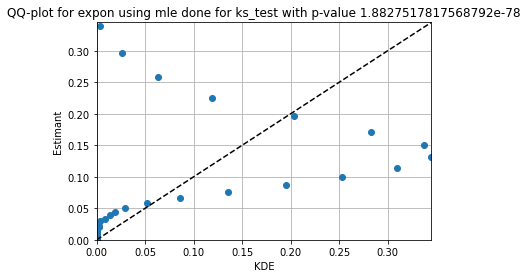

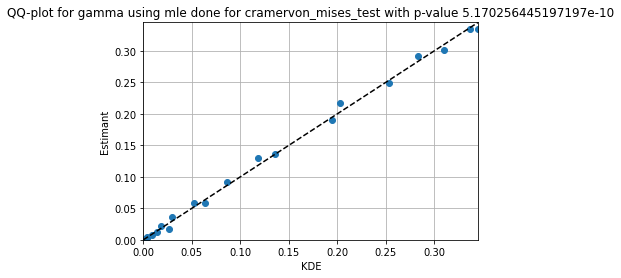

In [10]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 20)

[0.91390617 2.35895269 0.92349311]
[1.90422156 2.14169841 1.22501058]


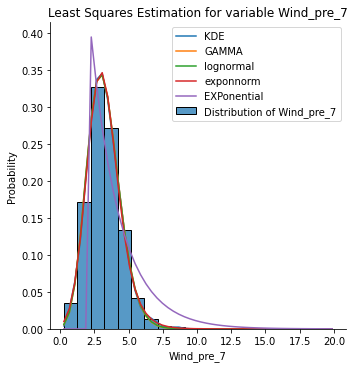

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9982239422031284, pvalue=5.941344359008739e-138), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.63471176863006, pvalue=5.042687378775668e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9980229218812834, pvalue=1.2653814830834166e-135), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.62909039770088, pvalue=5.01192198854028e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9958496003672433, pvalue=1.6051875936832635e-119), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.56584071841904, pvalue=4.677082054982407e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


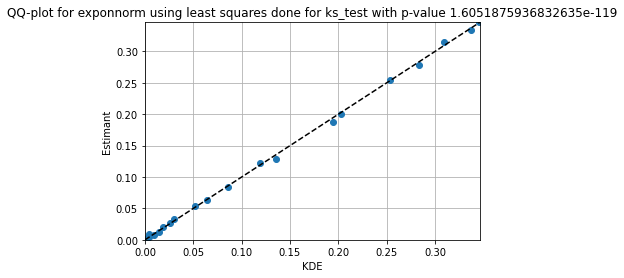

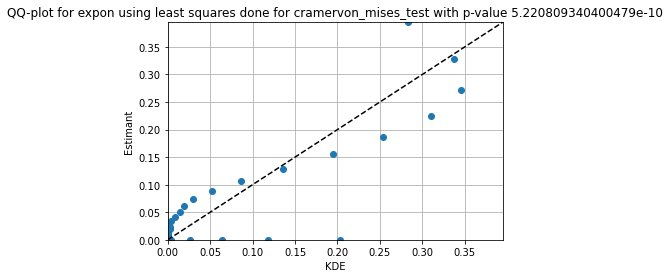

In [11]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 20)

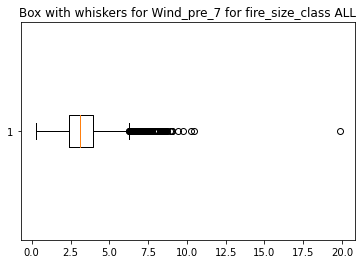

In [6]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()